In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Compare BTC BBW and BTC N_price

In [2]:
data= pd.read_csv('1718hourlyPrice_withZEC.csv')
data['time'] = pd.to_datetime(data['time'])

BBW = pd.read_csv('BBW.csv')
dataCompare = data[data['time'].isin(BBW.time)]
BTC_norm = (dataCompare.BTC - dataCompare.BTC.min()) / (dataCompare.BTC.max() - dataCompare.BTC.min()) 

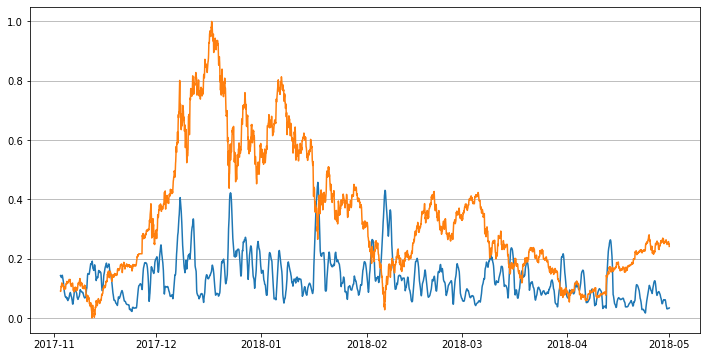

In [26]:
plt.figure(figsize=[12,6])

plt.plot(BBW.set_index(pd.to_datetime(BBW.time))['BTC'], label = 'BBW_BTC')
plt.plot(dataCompare.time,BTC_norm.values,label= 'Normalised Price_BTC')
plt.grid(axis='y')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.savefig('BBW_BTC vs N_Price_BTCwoLengend',transparent=True)

## Compare weighted BBW and FRM ws. 48

In [27]:
lambdas = pd.read_csv('lambdas.csv', index_col = 'time')
lambdas.index = pd.to_datetime(lambdas.index)

In [40]:
fig = go.Figure()
# for i in ['BTC', 'weighted.BBW','FRM']:
fig.add_trace(go.Scatter(x=lambdas.index, y=lambdas.iloc[:,0],name = 'NReturn_ws48', opacity = 0.5, 
                         line =dict(color=('rgb(1,1,1)'), width = 1)))
fig.add_trace(go.Scatter(x=lambdas.index, y=lambdas.iloc[:,3],name = 'NReturn_ws24', opacity = 0.5, 
                         line =dict(color=('rgb(255,0,0)'), width = 0.9)))
fig.update_layout(go.Layout(
            
            paper_bgcolor = 'rgba(0,0,0,0)',
             plot_bgcolor = 'rgba(0,0,0,0)'
        ))
fig.update_layout(title="Window Size 24 vs 48")

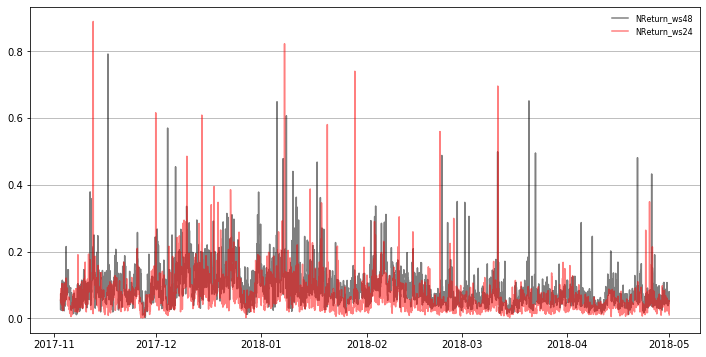

In [39]:
plt.figure(figsize=[12,6])

plt.plot(lambdas.index,lambdas.FRM_nreturn_ws48, label = 'NReturn_ws48',color='k',alpha=0.5)
plt.plot(lambdas.index,lambdas.FRM_nreturn_ws24, label = 'NReturn_ws24',color='r',alpha=0.5)
plt.grid(axis='y')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.savefig('./FRM NReturn ws24 vs ws48',transparent=True)

### Compare FRM ws. 48 with weighted BBW 

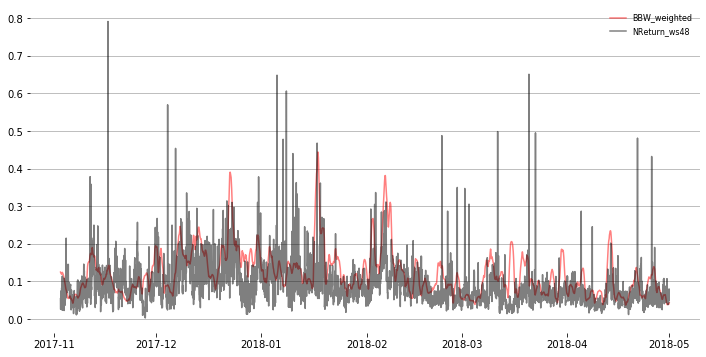

In [59]:
fig = plt.figure(figsize=[12,6])
ax = ax = fig.add_subplot(111)
plt.plot(pd.to_datetime(BBW.time),BBW['weighted BBW'], label = 'BBW_weighted',color='r',alpha=0.5)

plt.plot(lambdas.index,lambdas.FRM_nreturn_ws48, label = 'NReturn_ws48',color='k',alpha=0.5)

plt.grid(axis='y')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.legend(prop={'size': 8},frameon=False,loc='upper right')
#plt.savefig('./FRM NReturn ws24 vs ws48',transparent=True)